<a href="https://colab.research.google.com/github/David6230/Proyeccion_ventas/blob/main/proyecto_proyeccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de proyección de ventas

In [5]:
import pandas as pd
file_name = "/content/drive/MyDrive/CODIN DOJO/sales_predictions.csv"
df_ventas = pd.read_csv(file_name)
df_ventas.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# ¿Cuántas filas y columnas?

In [7]:
a_1 = pd.DataFrame(df_ventas.shape)


print(f"La base cuenta con {a_1[0][0]} filas y {a_1[0][1]} columnas.")

La base cuenta con 8523 filas y 12 columnas.


# ¿Cuáles son los tipos de datos en cada variable?

In [8]:
df_ventas.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* Los tipos de datos con los que cuenta la base de datos son **object** y **float64**.


In [9]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Análisis de datos duplicados

* Para realizar el análisis de registros duplicativos tomaremos la variable "Item_Identifier", como identificador único para determinar los registros duplicados.

In [10]:
# Procedo a realizar un testeo de un registro duplicado
#Genero una copia de mi base para no trabajar en la original

b_1 = df_ventas.copy()


In [11]:
b_1["dup"] = b_1["Item_Identifier"].duplicated()
a_1 = b_1[b_1["dup"] == True]
a_2 = b_1[b_1["Item_Identifier"] == "FDP49"]
a_2.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,dup
15,FDP49,9.0,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192,False
17,FDP49,9.0,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982,True
3973,FDP49,9.0,Regular,0.000000,Breakfast,55.2614,OUT018,2009,Medium,Tier 3,Supermarket Type2,552.6140,True
5630,FDP49,9.0,Regular,0.069229,Breakfast,55.9614,OUT045,2002,NaN,Tier 2,Supermarket Type1,386.8298,True
6040,FDP49,NaN,Regular,0.120966,Breakfast,55.8614,OUT019,1985,Small,Tier 1,Grocery Store,110.5228,True


* Del análisis exploratorio realizado a un registro que por el Item_identifier parecia duplicados, pero se pudo observar que en sí el registro no estaba duplicado ya que en las demás variables contenía información diferente.

* Como siguiente análisis se procede a realizar un "distinc" a la base con el objetivo de dar la última revisión a datos duplicados. Al igual que el caso anterior se realizará una copia de la base original.

In [12]:
b_1 = df_ventas.copy()

In [13]:
b_1.shape

(8523, 12)

In [14]:
b_2 = b_1.drop_duplicates()
b_2.shape

(8523, 12)

* El segundo análisis me indica que no existen datos duplicados en la base, por lo que se considera mantener todos los registros teniendo como primer criterio la duplicidad de la información.

# Identificación de valores faltantes en la base

In [15]:
df_ventas.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
a_1 = df_ventas["Item_Weight"].isna().sum()
a_2 = df_ventas["Outlet_Size"].isna().sum()

In [ ]:
print(f"Del análisi se puede observar que existen valores NaN en las variables Item_Weight con un total de {a_1}\ny la variable Outlet_Size {a_2} registros vacíos respectivamente.")

Del análisi se puede observar que existen valores NaN en las variables Item_Weight con un total de 1463
y la variable Outlet_Size 2410 registros vacíos respectivamente.


## Analisis los valores vacíos

* Si la variable cuenta con más del 45% de la data con NaN se procede a eliminar la variable.

In [17]:
nulos_Weight = (df_ventas["Item_Weight"].isna().sum()/len(df_ventas["Item_Weight"]))*100
nulos_Size = (df_ventas["Outlet_Size"].isna().sum()/len(df_ventas["Outlet_Size"]))*100

print(f"El porcentaje de nulos en la variable Item_Weight fue de {round(nulos_Weight,2)}% y de la variable Outlet_Size\nfue de {round(nulos_Size,2)}%, por debajo del 45% criterio de eliminación de la variable. Por lo que se decia\na mantener las variables y se analizará alguna aternativa de impitación de datos.")


El porcentaje de nulos en la variable Item_Weight fue de 17.17% y de la variable Outlet_Size
fue de 28.28%, por debajo del 45% criterio de eliminación de la variable. Por lo que se decia
a mantener las variables y se analizará alguna aternativa de impitación de datos.


# Confirmen que no hay valores faltantes después de abordarlos

* Se procede a realizar la imputación por la mediana de cada una de los valores tomando como punto de referencia el ID Item_Identifier.
* Se generará una copia de la base donde se va a realizar la imputación de datos.

In [18]:
dt1 = df_ventas.copy()

In [20]:
## Lleno los NaN con la mediana del peso y la moda
median_peso = dt1["Item_Weight"].median()
print(median_peso)

12.6


In [21]:
## Reemplazo los NaN con la median del peso
dt1["Item_Weight"].fillna(median_peso, inplace= True)

In [22]:
dt1["Item_Weight"].isna().sum()

0

In [23]:
size_comun = dt1['Outlet_Size'].mode()
print(size_comun)

0    Medium
dtype: object


In [24]:
dt1["Outlet_Size"] = dt1["Outlet_Size"].astype(str)

In [25]:
dt1["Outlet_Size"].value_counts()

Medium    2793
nan       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
dt1["Outlet_Size"].fillna(size_comun, inplace= True)

In [27]:
dt1["Outlet_Size"].isna().sum()

0

In [28]:
dt1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [29]:
dt1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
dt1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [31]:
dt1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## Se procede a arreglar la variable

In [32]:
dt1["Item_Fat_Content"] = dt1["Item_Fat_Content"].apply(lambda x: "Low Fat" if x in ["low fat","LF","Low Fat"] else "Regular" if x.lower() == "reg" else "Regular" )

In [33]:
dt1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [34]:
dt1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [35]:
a_1 = dt1["Item_Weight"].agg(["min","max","mean"])
print(a_1)

min      4.55500
max     21.35000
mean    12.81342
Name: Item_Weight, dtype: float64


In [ ]:
print(f"Los valores de la variable Item_Weigt para el máximo, mínimo y la media fueron:\npara el máximo:{round(a_1[1],2)}\npara el mínimo: {round(a_1[0],2)}\npara la media: {round(a_1[2],2)}")

Los valores de la variable Item_Weigt para el máximo, mínimo y la media fueron:
para el máximo:21.35
para el mínimo: 4.56
para la media: 12.81


# Análisis gráfico de la base de datos.

In [42]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Análisis de los productos y su contenido de grasa.

In [62]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

Text(0.5, 1.0, 'Participación por contenido en grasa')

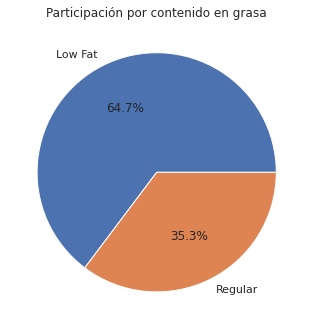

In [89]:
cuenta = dt1["Item_Fat_Content"].value_counts()

plt.pie(cuenta, labels=cuenta.index, autopct="%1.1f%%")
plt.title("Participación por contenido en grasa")

* Se puede apreciar que la composisición del portafolio de prodcutos, se distribuye en productos bajos en grasa con una participación del 64.7% y con contenido de grasa regular con el 35.3%.

# Histograma del precio máxmio de venta al público

Text(0, 0.5, 'Cuenta')

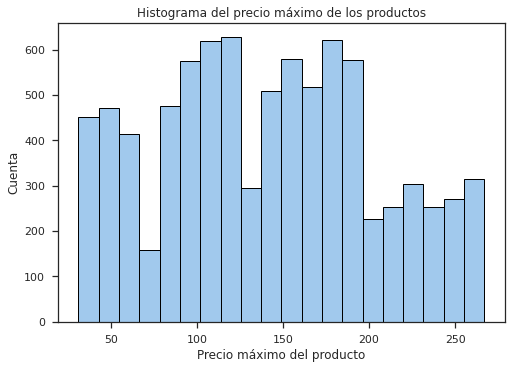

In [76]:
plt.style.use("seaborn")
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_MRP"].hist(bins=20, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma del precio máximo de los productos")
plt.xlabel("Precio máximo del producto")
plt.ylabel("Cuenta")

## Coeficiente de asimetría

In [77]:
sk_2 = dt1["Item_MRP"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 0.13, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


## Coeficiente de Curtosis

In [78]:
# Kurtosis

k_1 = dt1["Item_MRP"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de -0.89, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Histograma del peso de los productos

Text(0, 0.5, 'Cuenta')

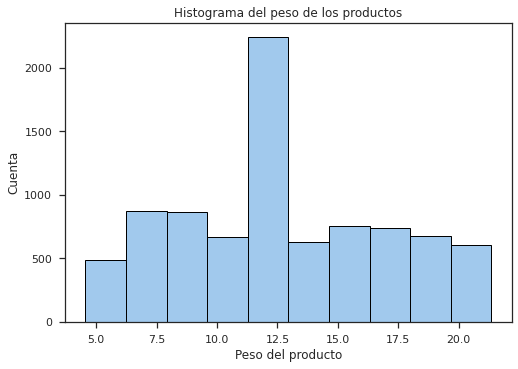

In [48]:
plt.style.use("seaborn")
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_Weight"].hist(bins=10, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma del peso de los productos")
plt.xlabel("Peso del producto")
plt.ylabel("Cuenta")




# Coeficiente de asimetría

In [70]:
sk_2 = dt1["Item_Weight"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 0.12, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


# Coeficiente de Curtosis

In [66]:
# Kurtosis

k_1 = dt1["Item_Weight"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica los datos tienen un ligero sesgo hacia la izquierda, ya que el valor del coeficiente de Kurtosis fue de -0.86, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Histograma de las ventas del Item

Text(0, 0.5, 'Cuenta')

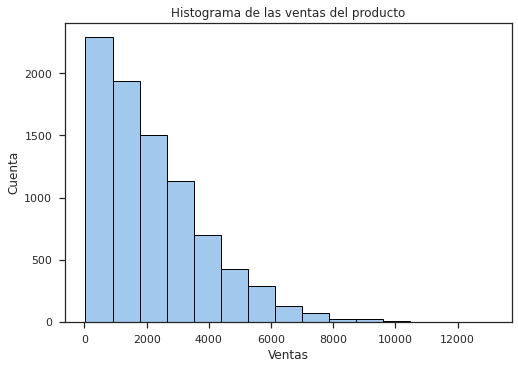

In [51]:
plt.style.use("seaborn")
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_Outlet_Sales"].hist(bins=15, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma de las ventas del producto")
plt.xlabel("Ventas")
plt.ylabel("Cuenta")


# Coeficiente de asimetría

In [71]:
sk_2 = dt1["Item_Outlet_Sales"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 1.18, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


# Coeficiente de Curtosis

In [72]:
# Kurtosis

k_1 = dt1["Item_Outlet_Sales"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de 1.62, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Análisis de cajas

## Análisis de las ventas del producto

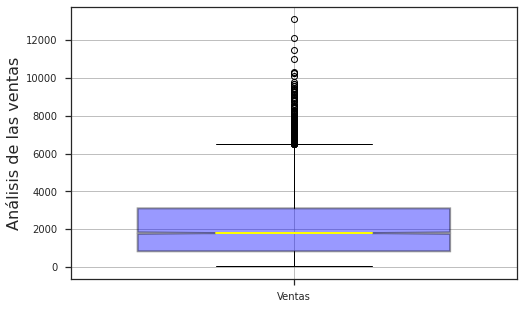

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_Outlet_Sales"]],
           notch = True,
           labels=["Ventas"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis de las ventas", fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

* De acuerdo con la gráfica se que los datos tienen presencia de outliers  dentro de la base de datos, por lo que la utilización del promedio como media de tendencia central, no sería la más indicada por los outliers presente. Un indicador que sería de más utilidad sería la mediana.

## Análisis del peso del prodcuto

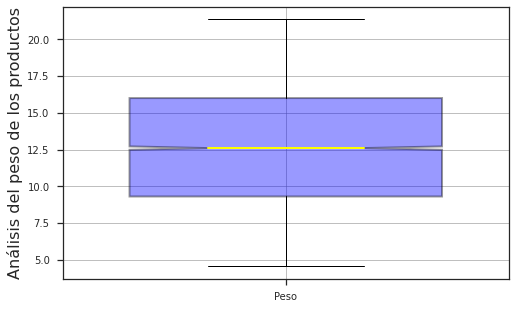

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_Weight"]],
           notch = True,
           labels=["Peso"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis del peso de los productos", fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

* Se puede apreciar que la gráfica de cajas está bien distrinuída el promedio del peso de los productos, visualmente se observa cerca del 12.5. Los datos no presentan outliers.

# Análisis del precio máximo del producto

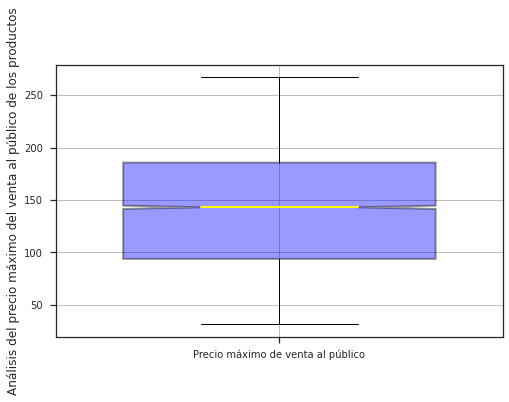

In [80]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_MRP"]],
           notch = True,
           labels=["Precio máximo de venta al público"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis del precio máximo del venta al público de los productos", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

*La gráfica de cajas nos confirma lo que visualmente se pudo apreciar en la gráfica del histograma, que no existen outliers dentro de la base, además no existe una amplia disperción en los precios máximos de venta al público, aunque para confirmar se deben realizar las pruebas estadísticas, como por ejemplo calcular el coeficiente de variación o la desviación estandar.


In [88]:
desv_est = np.std(dt1["Item_MRP"])
desv_est

print(f"Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso\nla desviación estandar fue de {round(desv_est,2)}, lo que nos indica que existe una amplia variabilidad en los datos con relación a la media.")

Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso
la desviación estandar fue de 62.27, lo que nos indica que existe una amplia variabilidad en los datos con relación a la media.


In [87]:
coef_var = desv_est / np.mean(dt1["Item_MRP"]) * 100

coef_var

print(f"Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso\nel coeficiente de variación fue de {round(coef_var,2)}, lo que nos indica que existe una amplia disperción en los datos con relación a la media.")

Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso
el coeficiente de variación fue de 44.17, lo que nos indica que existe una amplia disperción en los datos con relación a la media.


# Mapa de calor de la correlación

<AxesSubplot:>

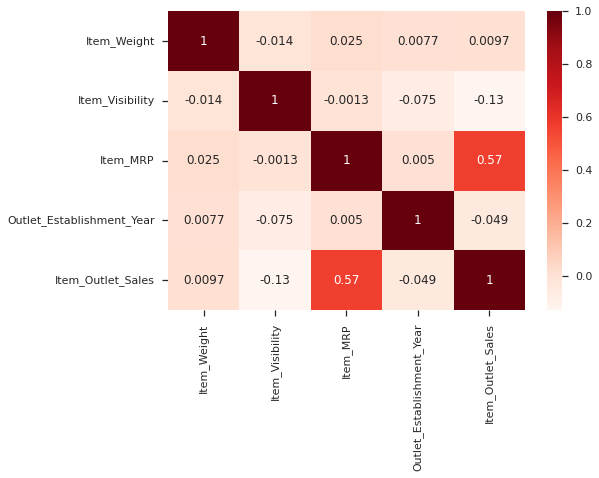

In [74]:
corr = dt1.corr()

corr

sns.heatmap(corr, cmap = "Reds", annot=True)

* El mapa de calor de la correlación, nos indica que existe una correlación positiva moderada entre el precio máximo de venta el público y las ventas.